## 회귀분석
---
- 아래 데이터를 가지고 charges를 종속변수로 하는 **의료비 예측 휘귀모델 만들기**
- 조건) statsmodels 활용
- 단계
    - 1) 데이터 로드, 라이브러리 임포트
    - 2) EDA
    - 3) 인코딩
    - 4) 모델링
        - 모델1. 모든 변수 사용
        - 모델2. 유의하지 않은 변수 제거
        - 모델3. 스케일링 적용
    - 5) 모델 결과 비교
    - 6) 모델 선택

#### **데이터셋 소개**
- age: 수익자 연령
- sex : 계약자 성별
- bmi : 몸무게를 키의 제곱으로 나눈 값, 정상범위 18.5 ~ 24.9
- children : 의료 보험이 적용되는 자녀 수/부양가족 수
- smoker : 피보험자의 흡연 여부
- region : 수익자의 거주 지역(4)
- charges : 의료비 

#### OLS 해석
---

![olssummary.png](data/olssummary.png)

### 1. 데이터 불러오기 & 라이브러리 임포트

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson

In [2]:
df = pd.read_csv('data/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. EDA

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

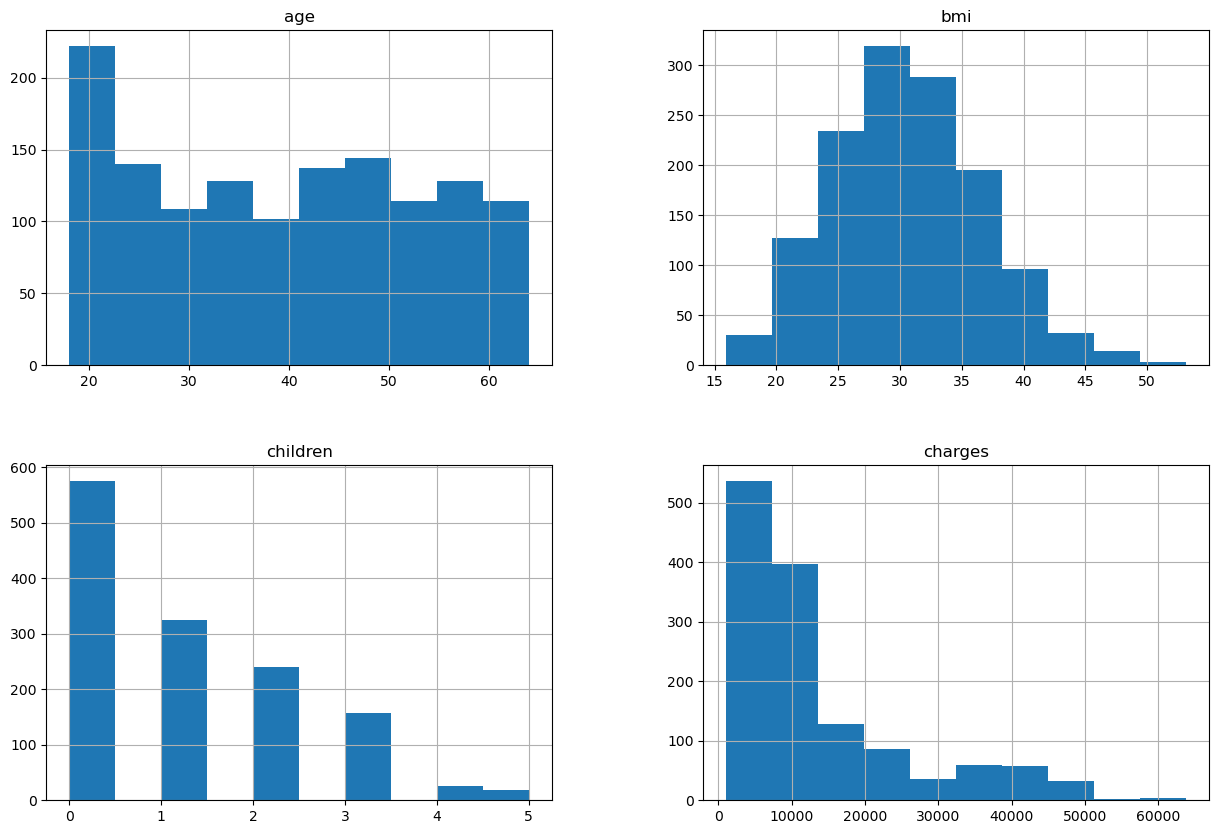

In [3]:
# 수치형 변수만 확인
df.hist(bins=10, figsize=(15, 10))

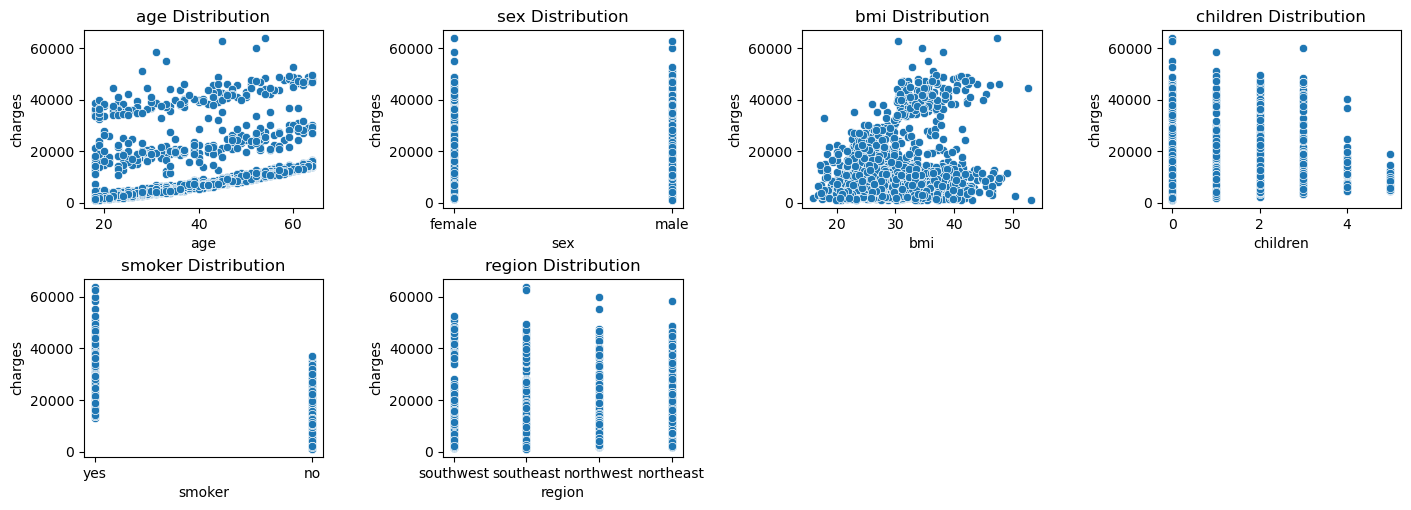

In [4]:
# y 변수에 대한 x 변수 분포

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(17,12))
plt.subplots_adjust(wspace= 0.5, hspace=0.4)

cal_feature =[ 'age','sex','bmi','children','smoker','region']

for idx, feature in enumerate(cal_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature,
                   y='charges',
                   data = df,
                   ax = ax)
    ax.set_title(f'{feature} Distribution')

### 3. 인코딩(pd.get_dummies)

In [5]:
# 범주형 변수 인코딩
df = pd.get_dummies(df, drop_first = True)

- 상관관계 시각화

<Axes: >

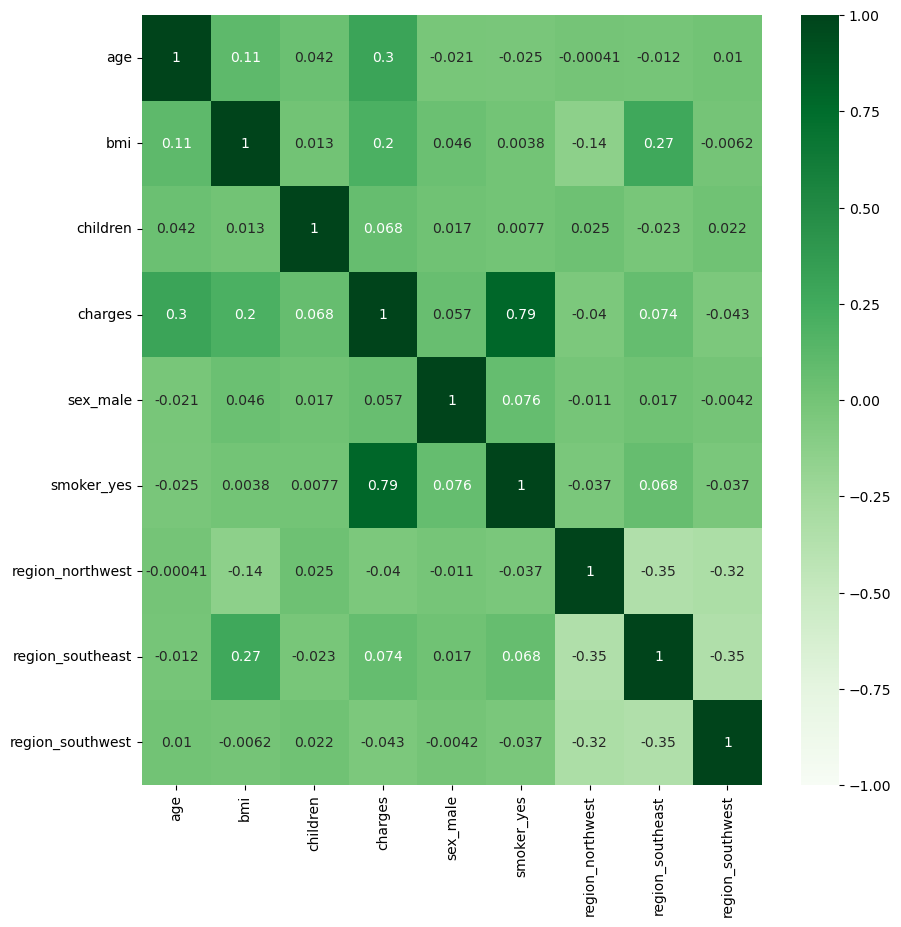

In [6]:
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df.corr(),
           annot=True,
           cmap='Greens',
           vmin = -1, vmax=1)

### 4. 모델링

#### 모델_1.모든 변수 사용

In [7]:
# 다중회귀모델 적합
model_1 = smf.ols('charges ~ age + bmi + children + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest', data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:59:35   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 유의하지 않은 변수를 찾고, pvalue의 의미를 설명하시오.

#### 모델_2.유의하지 않은 변수 제거

In [8]:
# p value 0.05 이상인 변수를 제거
model_1 = smf.ols('charges ~ age + bmi + children + smoker_yes + region_southeast + region_southwest', data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:59:35   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
age                257.0064     11.889     21.617      0.000     233.683     280.330
bmi                338.6413     28.554     11.860      0.000     282.625     394.657
children           471.5441    137.656      3.426      0.001     201.498     741.590
smoker_yes        2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
region_southeast  -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
region_southwest  -782.7452    413.756     -1.892      0.059   -1594.430      28.940
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 모델_3.스케일링 적용

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [10]:
# 'sex_male' > p value 0.05 이상
model_4 = smf.ols('charges ~ age + bmi + children + smoker_yes + region_southeast + region_southwest', data=scaled_df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:59:35   Log-Likelihood:                 1230.5
No. Observations:                1338   AIC:                            -2447.
Df Residuals:                    1331   BIC:                            -2411.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0520      0.008     -6.306      0.000      -0.068      -0.036
age                  0.1887      0.009     21.617      0.000       0.172       0.206
bmi                  0.2009      0.017     11.860      0.000       0.168       0.234
children             0.0376      0.011      3.426      0.001       0.016       0.059
smoker_yes           0.3806      0.007     57.921      0.000       0.368       0.393
region_southeast    -0.0137      0.007     -2.068      0.039      -0.027      -0.001
region_southwest    -0.0125      0.007     -1.892      0.059      -0.025       0.000
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         8.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. 모델 비교

**F-statistic 및 Prob (F-statistic)**
   - 첫 번째 모델의 F-statistic은 500.8, 두 번째, 세번쨰 모델은 668.3으로 조금 더 높음
       - 스케일링 전 후 F통계량이 같은 이유 : 스케일링은 각 독립 변수의 단위나 범위를 변경하지만, 변수 간의 상대적인 크기와 관계는 변경하지 않음
       - F-통계량의 값이 클수록 모델의 설명변수들이 종속변수를 설명하는 데 유의미한 기여를 한다고 해석
       
**Durbin-Watson 통계량**
   - 세 모델 모두 Durbin-Watson 통계량이 약 2.09로, 잔차 간의 자기상관이 거의 없음
   
### 6. 결론

- 세 모델 모두 R-squared 값이 0.750~0.751정도로 거의 동일하다. 
- 첫 번째 모델은 더 많은 변수를 포함하고 있지만, 일부 변수가 통계적으로 유의미하지 않기 때문에, 모델의 단순성을 고려할 때 두번째,세번째 모델을 선택할 수 있다.
- 스케일링 후 모델에서 AIC, BIC 값이 낮아졌기 때문에, 3번째 모델을 선택한다.

## 주요 평가지표 개념
![sst.png](data/sst.png)

### R-squared, Adjusted R-squared 의 차이
- R-squared(결정계수) = 1− SSE/SST, 회귀 모델이 종속 변수의 변동을 얼마나 잘 설명하는지를 나타내는 비율 > 독립변수가 추가될수록 값이 증가함 
- Adjusted R-squared(수정된 결정계수) = 1 - SSR/(n-k-1) /  SST/(n-1)
    - n : 표본의 수, k : 독립 변수의 개수

- 결정계수의 해석
    - 회귀모델에서 독립변수가 종속변수를 얼마나 잘 설명하는지 보여주는 지표(설명력)

=> 상관계수 : 독립변수 - 종속변수, 독립변수 - 독립변수 간의 상관도
=> 결정계수 : (회귀모델 + 독립변수) - 종속변수 의 상관도

### F - Statistic
- 전체 모델이 통계적으로 유의한지 검정(적합도 검정)> 크면 클수록 좋은값
- 판단 : F 통계량에 대한 Pvalue가 주어짐
- 수식 : Mean(SSR) / Mean(SSE) > 평균을 내기 위해서 자유도로 나눠줌
    - MSR과 MSE를 각각의 자유도에 대해 평균화하면, 모델의 설명력과 오차를 보다 공정하게 비교할 수 있음
    - 모델이 실제로 데이터를 잘 설명하는지, 아니면 단순히 우연에 의한 것인지를 판단 가능
- R squared 와의 차이
    - R²는 모델의 설명력을 평가하는 반면, F 통계량은 모델의 유의미성을 평가
    - F 검정은 분산비의 검정 > 즉,Residual에 비해 얼마나 Regression이 개선되었는가를 분산으로 측정하는 것

### 변수 선택 방법 성능 지표

#### AIC(Akaike Information Criterion) , BIC(Bayesian Information Criterion)
![우도.png](data/우도.png)

- Bias(편향) : 변수를 제거하면서 생기는 오류
- Varience : 변수가 증가하면서 생기는 오류

- Information Criterion : 최대가능도(우도)에 독립변수 개수에 대한 손실(Penalty)를 반영하는 방법 > 변수 선택에 쓰임
- L : Likelihood(우도, SSE / n), p : 변수의 개수, n : 데이터 개수
    - AIC = -2Log(L) + 2p
    - BIC = -2Log(L) + pLog(n) - 매개변수 수에 더 큰 패널티
    - -2Log(L) : 적합도


=> AIC, BIC 를 최소화한다 > 우도를 가장 크게 하는 동시에 변수의 개수는 가장 적은 최적의 모델을 의미 > SSE(제곱 오차의 최소 합)를 최소화하는 것은 R squared 를 최대화하는 것